Дана статистика пользователей adult.csv.

Получите значения AUC для различных моделей и их параметров.

Решением будет ссылка на гитхаб с ноутбуком.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
X = df.drop(['income', 'fnlwgt'], axis=1)
y = df['income']

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
X = pd.get_dummies(X)

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [145]:
algorithmsML = [[["LogisticRegression"],[LogisticRegression()]],
             [["LogisticRegression, c=1.0"],[LogisticRegression(C=1.0)]],
             [["RandomForestClassifier"],[RandomForestClassifier()]],
             [["RandomForestClassifier, n=10, md=5"],[RandomForestClassifier(n_estimators=10, max_depth=5,)]],
             [["KNeighborsClassifier"],[KNeighborsClassifier()]],
             [["KNeighborsClassifier, nn=20"],[KNeighborsClassifier(n_neighbors=20)]],
             [["BaggingClassifier"],[BaggingClassifier()]],
             [["BaggingClassifier, ne=20"],[BaggingClassifier(n_estimators=20)]]]

In [148]:
algoritms = []
lines = []
scores = []

for algorithm in algorithmsML:
    model = algorithm[1][0].fit(X_train, y_train)
    
    proba = model.predict_proba(X_test)[:,1]
    
    algoritms.append(algorithm[0][0])
    scores.append(roc_auc_score(y_test, proba))
    lines.append(roc_curve(y_test, proba))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


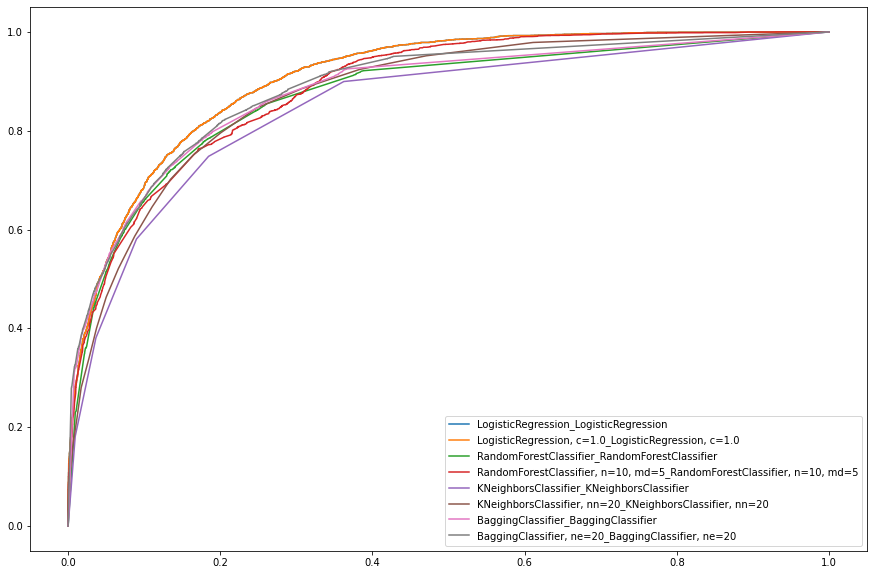

In [149]:
plt.figure(figsize=(15,10))

for i in range(len(algoritms)):
    
    plt.plot(lines[i][0], lines[i][1], label='{}_{}'.format(algoritms[i], algoritms[i]))
    
plt.legend()
plt.show()

In [157]:
for i in range((len(algoritms))):
    print('{}_{}: {}'.format(algoritms[i][:15], algoritms[i][1], scores[i]))

LogisticRegress_o: 0.9056439618115626
LogisticRegress_o: 0.9056439618115626
RandomForestCla_a: 0.8715021965477967
RandomForestCla_a: 0.8875089367656303
KNeighborsClass_N: 0.8491907677304281
KNeighborsClass_N: 0.8765188670160743
BaggingClassifi_a: 0.8786626435150692
BaggingClassifi_a: 0.8866315309270201
